### Create a function that returns True if given sentence is palindrome by word, else return False.
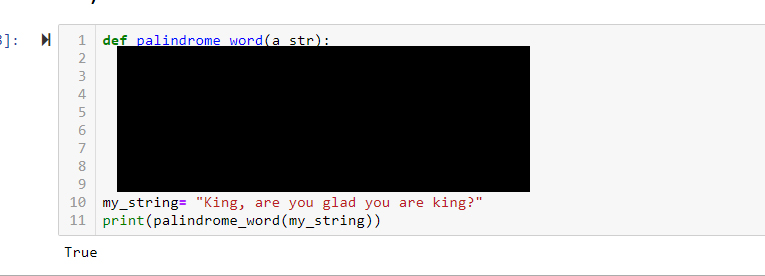

In [ ]:
def palindrome_word(a_str):

    stack = "".join([char.lower() for char in a_str if char.isalpha() or char == " "]).split(" ")
    # Letters to lowercase for consistent check. Only keep letters and spaces in a_str. Concat a_str, then split using spaces
        
    return stack[::1] == stack[::-1]  # compare normal and reversed to match

my_string = "King, are you glad you are king!"
print(palindrome_word(my_string))

True


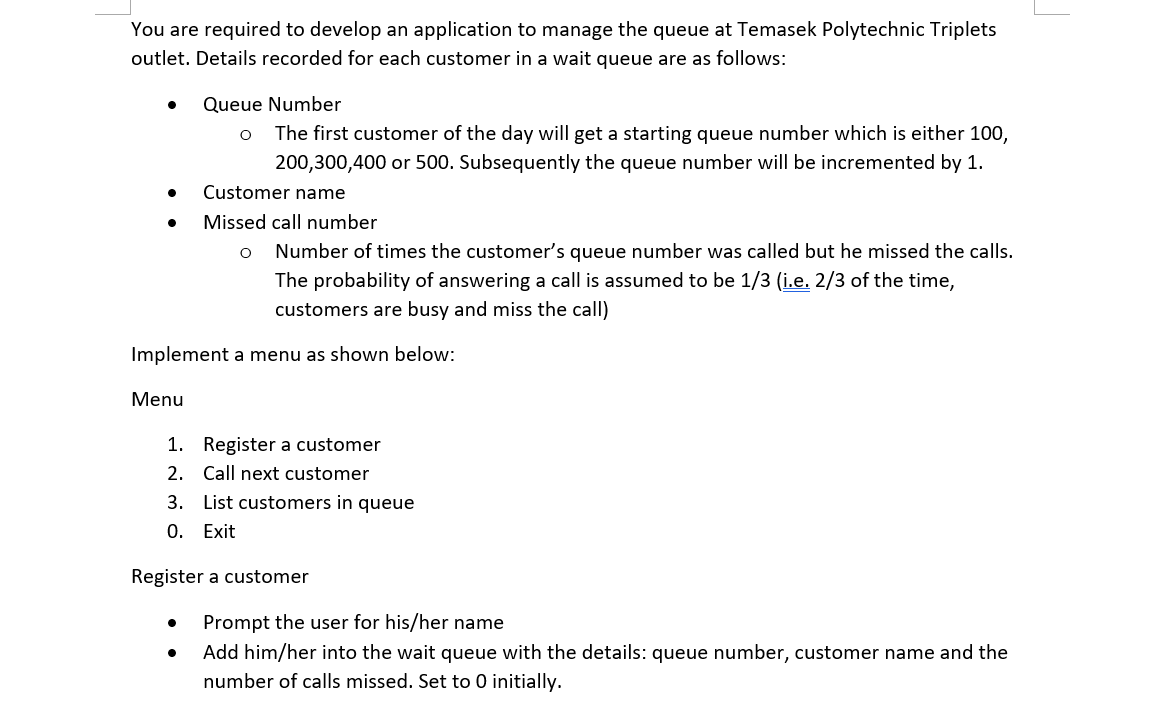
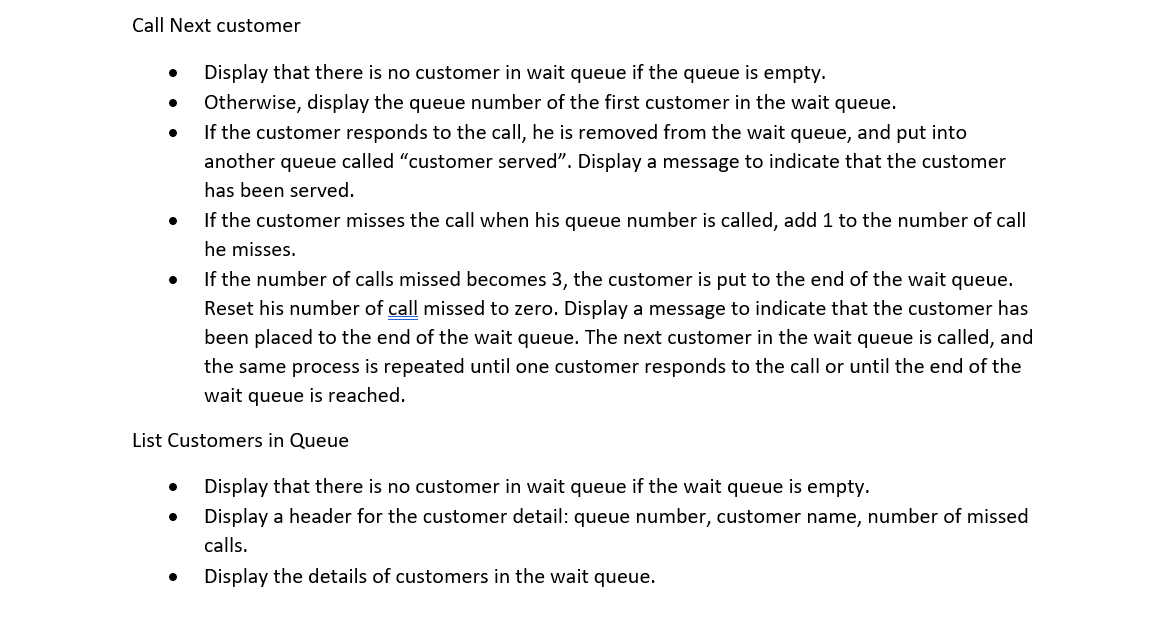

In [ ]:
import random
from time import sleep                                                    # add cooldown
from collections import deque

def register_customer(queue):
    
    name = input("May I have your Name please: ")
    
    if not queue:
        new_queue = random.choice([100, 200, 300, 400, 500]) 
    else:
        new_queue = max([customer[0] for customer in queue]) + 1          # largest existing queue number + 1

    customer = [new_queue, name, 0]                                       # Queue Number, Customer's Name, Missed calls
    queue.append(customer)


def call_customer(queue, served):
    
    if not queue:
        print("Queue empty.")
        return (queue, served)
    
    called_customer = queue.popleft()                                    # call the First in queue; it is removed from queue.
    
    for tries in range(3):
        print(f'Calling queue number {called_customer[0]} {called_customer[1]} your waffle is ready!')
        sleep(1)                                                         # cooldown for a second
        
        chance = random.choice([1, 2, 3])
        
        if chance == 1:                                                  # 1/3 possibility of success
            print(f'We have served Queue number {called_customer[0]}')
            served.append(called_customer)                               # required to record Customers served in a list.
            
            return (queue, served)
        
    # unsuccessful after 3 tries
    print(f'Has tried 3 times calling Queue number {called_customer[0]}. Will put {called_customer[1]} behind the queue')
    called_customer[2] += 1                                               # add +1 Missed call
    queue.append(called_customer)                                         # add Customer back to queue

    return call_customer(queue, served)                                   # call next Customer again as this attempt Failed.


def list_customers(queue):
    
    if not queue:
        print("There is no customer in the queue")
    else:
        print(f'Queue Number {" " * 6} Customer Name {" " * 6} Number of missed Call')            # header
        
        for customer in queue:
            print(f'{" " * 6} {customer[0]:<12} {customer[1]:<30} {customer[2]}')                 # details


def main():
    queue = deque()
    served = []
    
    menu = ('''
       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    ''')
    
    while True:
        print(menu)

        entry = input("Please choose: ")
        if entry == "1":
            register_customer(queue)
        elif entry == "2":
            queue, served = call_customer(queue, served)
        elif entry == "3":
            list_customers(queue)
        elif entry == "4":
            break
        else:
            print("Invalid option")
            
    print("End of Program")

main()


       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 1
May I have your Name please: John

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 1
May I have your Name please: Bob

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 1
May I have your Name please: Lol

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 3
Queue Number        Customer Name        Number of missed Call
       400          John                           0
       401          Bob                            0
       402          Lol                            0

       Menu
        1. Register a customer
        2. Call next customer
        3. List cust

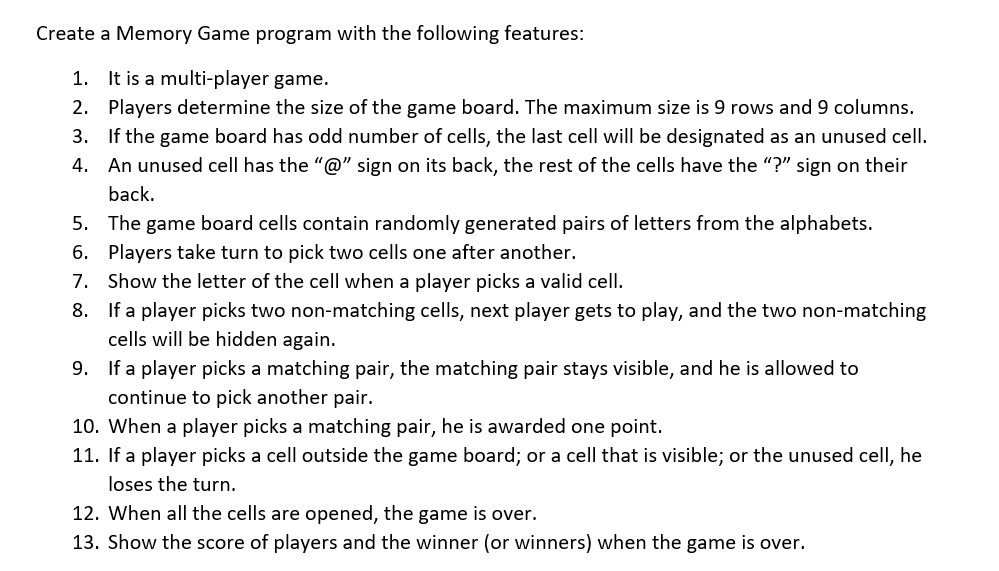

In [2]:
import random
from time import sleep

def play_game(board_size, player, board, answer, players):
    
    if board == answer:
        return False                                         # end game
    
    rows = board_size // 10
    cols = board_size % 10
    
    def print_board():
        print("  " * 17, end="")
        for col in range(cols):
            print(col, end=" ")
        print()                                              # print new line

        for row in range(rows):
            print(str(row).rjust(33), end=" ")
            for col in range(cols):
                print(board[row][col], end=" ")
            print()
            
        print()

    def input_pos():
        print(f"Hello {player}!")
        pos = input("Which cell do you want to open? (row,column) ")
        
        try:
            x, y = [int(i) for i in pos]                     # for an Int in pos[i], assign Int to x, then y.
            if board[x][y] == "?":                           # check if slot is available
                return x, y                                  # return pos if that slot is available
            else:
                print("Duplicate Cell: Turn forfeited!")
                return "F", "F"                              # if cell is already open, return False
                
        except:
            print("Invalid Cell: Turn forfeited!")           # when invalid and unknown pos given, return False
            return "F", "F"
    
    def open_cell(x, y):                      
        board[x][y] = answer[x][y]                           # reveal board's answer by replace "?" with its answer value
        print_board()
            
    # Playing Sequence:
    print_board()
    
    x_1, y_1 = input_pos()                                   # prompt for first guess
    
    if x_1 == "F":                                           # if False is return, return to stop turn
        return (board, answer, players)
    else:
        open_cell(x_1, y_1)                                  # else, reveal the answer for pos given
    
    x_2, y_2 = input_pos()                                   # prompt for second guess
    
    if x_2 == "F":
        board[x_1][y_1] = "?"                                # if False pos, revert the previous board reveal to hide back
        return (board, answer, players)                      # before return to stop turn
    else:
        open_cell(x_2, y_2)
    
    
    if (answer[x_1][y_1] == answer[x_2][y_2]) and not (x_1 == x_2 and y_1 == y_2):            
    # if both guesses match AND are not the same cell
        players[player] += 1                                                  # add 1 point to player who made the guesses
        print("Good Job!")
        play_game(board_size, player, board, answer, players)                 # rerun this function to repeat player's turn
    else:
        board[x_1][y_1], board[x_2][y_2] = "?", "?"                           # hide the revealed cards
        print(f"Sorry {player} please try again when it is your turn")

    return (board, answer, players)                                           # return the data to be reused again


def init_game(board_size):
    rows = board_size // 10
    cols = board_size % 10
    count = rows * cols
    odd = count % 2 == 1
    
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
    pairs = []
        
    while len(pairs) < (count // 2):
        randIndex = random.randint(0, len(letters) - 1)                     # randomly select an index within letters
        if letters[randIndex] not in pairs:                                 # ensure every letter pair is unique
            pairs.append(letters[randIndex]) 
        
    pairs = pairs * 2                                                       # duplicate to create pair
    random.shuffle(pairs)                                                   # shuffle the list of letters
    
    board = [["?" for col in range(cols)] for row in range(rows)]                              # append ? for each card in board
    answer = [[pairs[(r * cols + c) % len(pairs)] for c in range(cols)] for r in range(rows)]  # append a letter to each card for board's answer
    
    if odd:
        board[-1][-1], answer[-1][-1] = "@", "@"                            # fill up odd, unused tile
    
    players = dict()

    while True:
        player_names = input("This is a multiplayer game, please provide name of player (seperated by comma): ")
        names = player_names.split(',')
        
        if len(names) == len(set(names)):   # set only allows unique values, duplicates will be removed and condition would not meet.
            break
        else:
            print("Error: Duplicate player names detected. Please enter unique names for each player.")

    # Add player names and scores to the dictionary
    for name in names:
        players[name] = 0
    
    turn = 0
    
    while True:
        player = names[turn]
        progress = play_game(board_size, player, board, answer, players)
        if progress == False:                                         # when gameover
            print("Game Over")
            print("Name: " + " " * 10 + " number of correct match")

            for key, value in players.items():
                print(f"{key:<24} {value}")

            max_value = max(players.values())                                             # find max value in players
            winners = [player for player, value in players.items() if value == max_value] # for player with value == max_value, append to winners
            print(f"Winner(s): {', '.join(winners)}")
            break                                                    # stop game
            
        turn = (turn + 1) % len(names)                               # modulo will reset counter to 0 after a full cycle
            
            
def memory_game():
    print(f"{'Welcome to my Memory Game':>50}")
    
    while True:
        board_size = int(input("Please provide the size of game board (e.g. 23 for 2 rows 3 columns): "))
            
        if board_size > 99:
            print("Invalid size (Limit is 9 rows 9 columns)")   
        elif board_size < 12:
            print("Invalid size (2 digits are required)")
        else:
            break

    init_game(board_size)
        
memory_game()

                         Welcome to my Memory Game
Please provide the size of game board (e.g. 23 for 2 rows 3 columns): 23
This is a multiplayer game, please provide name of player (seperated by comma): j,a,v,e,n
                                  0 1 2 
                                0 ? ? ? 
                                1 ? ? ? 

Hello j!
Which cell do you want to open? (row,column) 00
                                  0 1 2 
                                0 I ? ? 
                                1 ? ? ? 

Hello j!
Which cell do you want to open? (row,column) 83
Invalid Cell: Turn forfeited!
                                  0 1 2 
                                0 ? ? ? 
                                1 ? ? ? 

Hello a!
Which cell do you want to open? (row,column) 01
                                  0 1 2 
                                0 ? k ? 
                                1 ? ? ? 

Hello a!
Which cell do you want to open? (row,column) 02
                                